# DISTRIBUCIÓN NORMAL

In [67]:
import numpy as np
import matplotlib.pyplot as plt

* Para explicar la Distribución Normal de manera práctica, directa y sin rodeos, primero necesitamos simular datos que sigan esta regularidad de tipo normal (ya expliqupe en otro notebook sobre otras regularidades: la binomial e la hipergeométrica - revisalo en mi repositorio de github).
* Esto lo visualizamos fácilmente con el siguiente bloque de código, donde se genera y grafica dicha distribución.

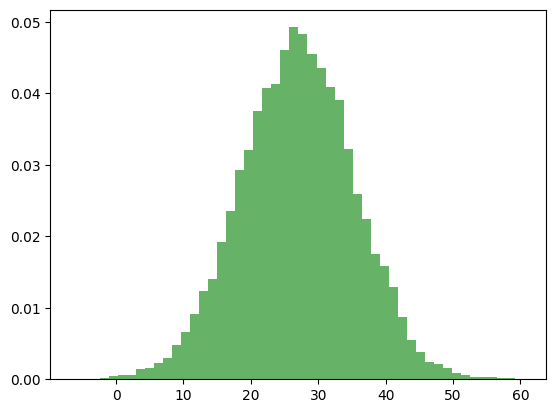

In [68]:
# Generamos una poblacion de datos
pop = np.random.normal(27, 8.4, 13000) #A modo de ejemplo podemos decir que tenemos una poblacion de 13000 niños, el peso promedio de un niño es de 27, con una desviacion estandar de 2.4.
plt.hist(pop, bins=50, density=True, alpha=0.6, color='g');

Conociendo la media y la desviación estándar de una distribución normal podemos responder varias preguntas importantes....

* Podemos determinar qué tan probable es observar ciertos valores, identificar qué tan alejados están los datos respecto al promedio, comparar diferentes conjuntos de datos usando la misma escala (estandarización), y estimar qué porcentaje de la población cae dentro de cierto rango.
En otras palabras, la media describe el centro de la distribución y la desviación estándar describe su dispersión, y juntas nos permiten interpretar, predecir y cuantificar la variabilidad de cualquier fenómeno que siga un comportamiento normal.

### La Media Muestral y La Media Poblacional ( Valor El Esperado)

In [69]:
# Realizamos muestreos repetidos y calculamos las medias muestrales
trials = 1000 #Numero de muestras
size = 12 #Tamaño de la muestra
means = [] #Lista para guardar las medias muestrales
for _ in range(trials):
    means.append(np.random.choice(pop, size).mean())

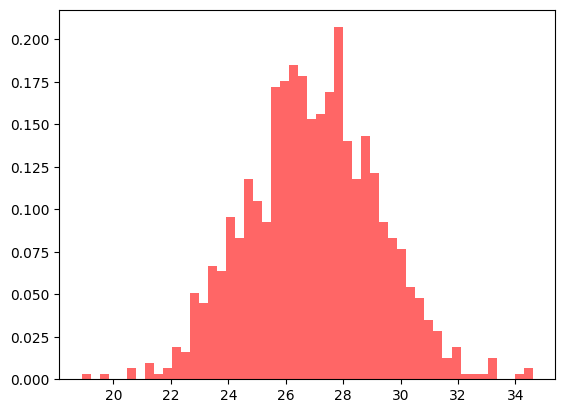

In [70]:
# Graficamos la distribución de las medias muestrales
plt.hist(means, bins=50, density=True, alpha=0.6, color='r');

* Como se puede observar, la media muestral (promedio) se distribuye de forma normal (es decir siguen una regularidad normal.).
* En teoria esta simulación es una muestra de lo que se dice de que "A una variable aleatoria normal la describe su media y desviacion estandar"

In [71]:
# Función para calcular la media aritmética
def mean(arreglo):
    return sum(arreglo)/len(arreglo) #Media aritmetica

In [72]:
#hallamos la media aritmetica de las medias muestrales
mean(means) # la media (el promedio) se distribuye de forma normal con el promedio de la poblacion (miu=27)

np.float64(26.956344194942265)

Como se puede ver, el promedio de las medias 26.9 es casi el mismo promedio de la población 27.

* **El valor esperado del promedio muestral es igual al valor esperado de la poblacion (miu)**, es decir la media aritmetica es un buen estimador de la media poblacional
* el promedio muestral es un estimador insesgado, no tiene sesgo, porque cuando realizo todas muchas pruebas, intentos, trials, encuentro lo que busco, en este caso la media poblacional (miu)

### Desviación Estandar
#### Averiguemos una formula para averiguar que tan flacos o gordos son los niños, es decir que tan variable es su peso (para este caso como ejemplo le pusimos 8.4 de varianza)

La varianza muestral tiene su formula:
$$
s^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$


In [73]:
# Función para calcular la desviación estándar
def std(arreglo, sesgo):
    media = mean(arreglo)
    acum = 0
    for val in arreglo:
        term = (val - media)**2
        acum = acum + term
    return (acum/(len(arreglo)-sesgo))**0.5

#### Entonces ahora hallemos el promedio de las desviaciones estandar de las medias muestrales, y notaremos que el promedio de las desviaciones muestrales es igual al valor esperado para la desviacion estandar de la poblacion (8.4 como se definio al inicio)

In [74]:
#hallamos la desviacion estandar de las medias muestrales para ver si es un valor insesgado
trials = 10000
desviaciones_n = []
desviaciones_n_1 = []
for _ in range(trials):
    sample = np.random.normal(27.4, 8.4, size) # muestra aleatoria de tamaño "size", extraida de una poblacion normal con media 27.4 y desviacion estandar 8.4
    #desviaciones_n.append(std(sample)) # sesgado - estima con precisión la desviación estándar de la muestra
    desviaciones_n_1.append(std(sample, 1)) # insesgado - estima con mas precisión la desviación estándar de la población

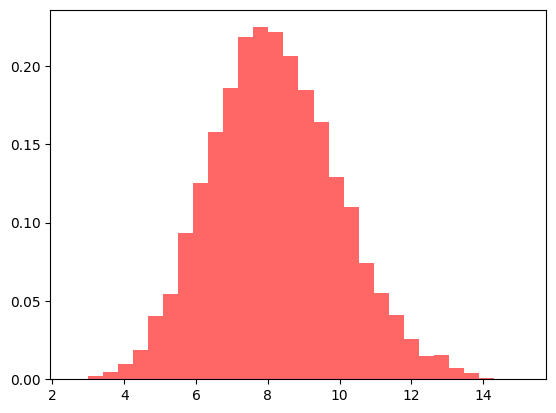

In [75]:
plt.hist(desviaciones_n_1, bins=30, density=True, alpha=0.6, color='r');

In [76]:
#veamos si esto es un estimador insesgado o sesgado
mean(desviaciones_n_1), 8.4

(np.float64(8.213196411055819), 8.4)

- La formula con solo n da como resultado una desviacion estandar muestral sesgado, lo cual indica que no es igual, ni muy cercano al 8.4 (desviacion estandar de la poblacion).

- A diferencia del valor que se acaba de hallar con la formula que contiene como divisor a n-1, dando un resultado insesgado, lo cual indica que es igual o se acerca mucho a 8.4. Y a esto lo llamamos llegar al valor esperado.

- Esto es importante porque cuando tengo una base de datos, yo debo usar la formula matematica que tiene como divisor a n-1, con el objetivo de describir la varianza de los datos.

- Es importante mencionar que la formula que tiene como divisor solo a "n" en la formula de la desviacion estandar, solo lo usan aquellos que quieren demostrar conceptos teoricos, en la practica real usamos n-1.

### Desarrollemos un caso importante: transformar una variable para que tenga media 0 y desviación estándar 1

Imaginemos una distribución normal cualquiera. Su media puede tomar cualquier valor, y su desviación estándar también puede ser cualquiera. Sin embargo, independientemente de esos valores originales, podemos transformar la distribución para que siempre tenga media 0 y desviación estándar 1.

A este proceso se le llama estandarización, y el resultado es una nueva variable expresada en términos de su puntaje Z. Esta transformación es extremadamente útil porque permite comparar datos que provienen de diferentes escalas o unidades.

El puntaje Z es fundamental en estadística y tiene aplicaciones muy importantes en áreas como neonatología, pediatría y ciencias biomédicas, donde es común evaluar cuánto se aleja un valor respecto al promedio de una población de referencia.
* 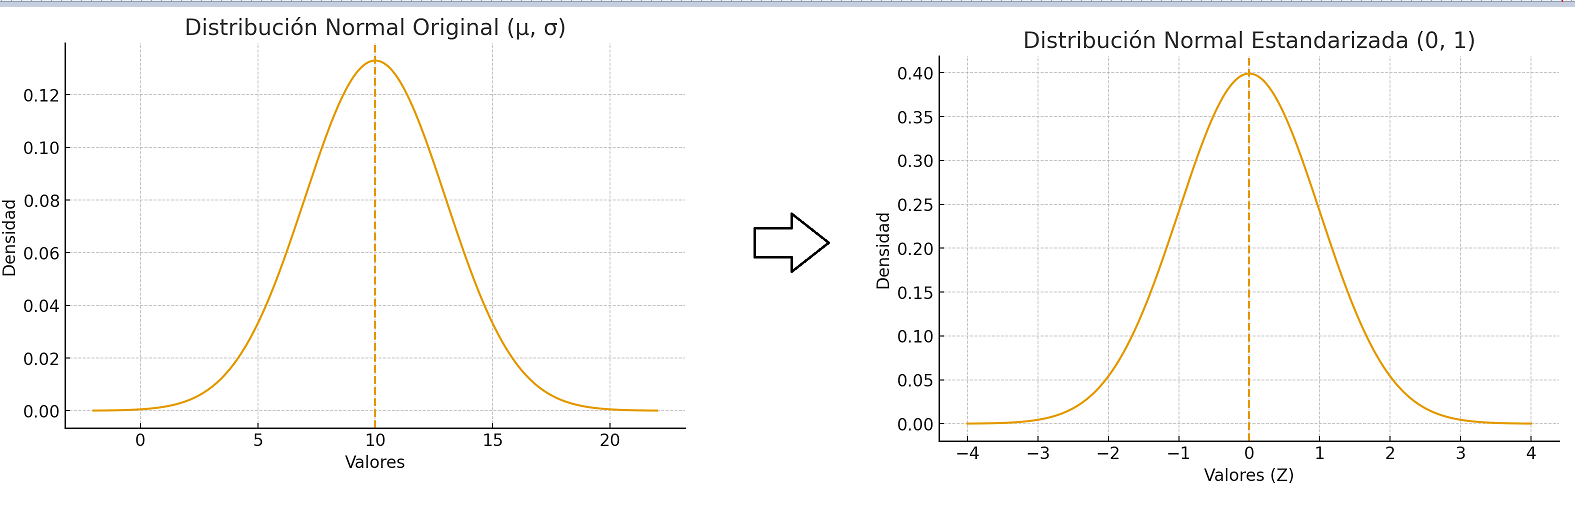

* ¿Como hacemos esto? Imaginemos que tenemos un grupo de perros y como datos tenemos sus pesos (30, 50, 20), para estandarizarlo a cada uno se le resta el promedio, al resultado se le divide entre la desviacion estandar. 

$$
Z_i = \frac{X_i - \bar{X}}{S}
$$

En base a esto podemos entender algo mas respecto a lo que significa Zi, frente a la desviacion estandar.
$$
X_i = Z_i \, S + \bar{X}
$$

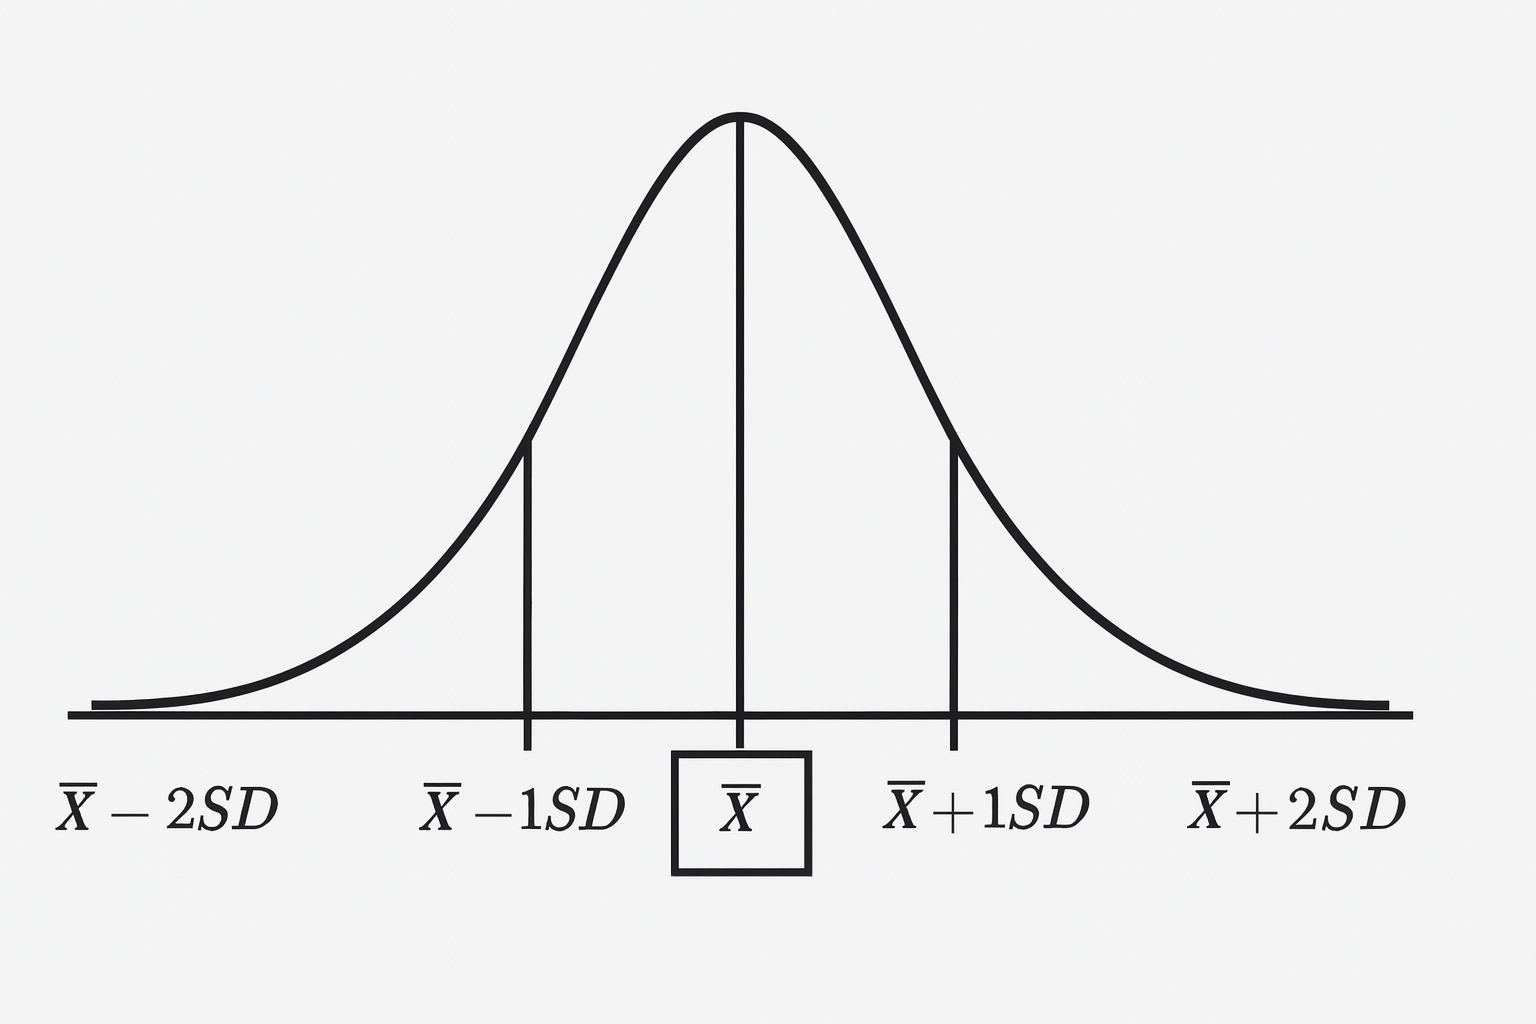

Aqui podemos concluir que Zi nos dice a cuantas desviaciones estandar del promedio estoy. Saber y comprender esto nos permite:
* Comparar curvas, porque aqui estamos concluyendo a cuantas desviaciones estandar esta una observacion respecto a su promedio 

##### Hagamos un ejemplo sencillo para explicar esto

In [77]:
#Calculamos la media de la distribución estandarizada
arreglo = np.array([10, 30, 40])

In [78]:

(arreglo - arreglo.mean())/arreglo.std() # 

array([-1.33630621,  0.26726124,  1.06904497])

Esto se lee de la siguiente manera:
* 10 se encuentra a -1.33 desviaciones estandar del promedio
* 30 se encuentra a 0.26 desviaciones estandar del promedio
* 40 se encuentra a 1.06 desviaciones estandar del promedio

Aqui logramos el objetivo de estandarizar, porque si sacamos la media tendremos un valor muy cercano a 0, y si sacamos su desviacion estandar tendremos como resultado a 1.

In [79]:
#Calculamos la media de la distribución estandarizada
((arreglo - arreglo.mean())/arreglo.std()).mean()

np.float64(-7.401486830834377e-17)

In [80]:
#Calculamos la desviacion estandar de la distribución estandarizada
((arreglo - arreglo.mean())/arreglo.std()).std()

np.float64(1.0)

**Esto se cumple para cualquier conjunto de datos**, Con esto podemos hacer que los datos de diferentes conjuntos de datos hablen un mismo idioma por asi decirlo, pues los estamos metiendo en el mundo de los ceros y uno.

## Regla Empirica

La regla empirica solo es para las variables normales y nos indica lo siguiente
* el 68% de los datos esta a una desviacion estandar de la media
* El 95% de los datos esta a 2 desviaciones estandar de la media
* un 99,7 % de los datos esta a 3 desviaciones estandar de la media
* Poniendo un caso si tenemos una variable normal y nos aparece que un dato esta a 4.5 desviaciones estandar de la media, quiere decir que es un dato poco probable de observar en una distribucion normal

***En respuesta a la pregunta que tan flacos o gordos estan los niños, podriamos dar como respuesta:***
* El 68% de los niños pesan entre 18.6 kg y 35.4 kg (media ± 1 desviación estándar)
* El 95% pesan entre 10.2 kg y 43.8 kg (media ± 2 desviaciones estándar)
* Los niños más "gordos" o "flacos" están más alejados de la media

## Ahora que pasa con las variables que no tienen un comportamiento normal?
De esto nace un Teorema de Chebyshev, el cual nos dice que sin importar el tipo de distribucion, al menos el 1-1/K^2 esta a "K" desviaciones estandar de la media.

In [81]:
def sheby(K):
    return 1-(1/K**2)

In [82]:
sheby(2)

0.75

Cheby nos indica que **al menos** el 75% de los datos se encuentra a 2 desviaciones estandar de la media, sea cual sea la distribucion de los datos

# PDF (Probability density funtion) y CDF (Cumulative Distribution Funtion) Normal Distribution

La PDF y la CDF son dos herramientas fundamentales para describir una distribución probabilística, pero cada una cumple un propósito distinto.

### PDF — Probability Density Function

La PDF no entrega probabilidades exactas para un valor puntual.
Por ejemplo, no podemos preguntar:

* “¿Cuál es la probabilidad de que una persona pese exactamente 30 kg?”

Esa probabilidad es cero, porque en una distribución continua hay infinitos valores posibles.

Lo que sí hace la PDF es:
* Construir la forma de la curva.
* Mostrar qué valores son más o menos densos (más o menos frecuentes).
* Permitir visualizar el comportamiento de la distribución.

***Objetivo principal de la PDF: Describir la densidad y la forma de la distribución, no calcular probabilidades directamente.*** 

### CDF — Cumulative Distribution Function
La CDF sí permite calcular probabilidades, porque representa el área acumulada bajo la curva.
Con ella sí podemos preguntar:

* “¿Cuál es la probabilidad de que una persona pese menos de 30 kg?”

Y la CDF devolverá esa probabilidad acumulada.

Lo que hace la CDF es:
* Calcular áreas bajo la curva.
* Entregar probabilidades acumuladas desde −∞ hasta un valor específico.
* Permitir determinar percentiles y rangos probabilísticos.

***Objetivo principal de la CDF: Calcular probabilidades y percentiles dentro de la distribución***

Ejemplos

In [83]:
from scipy.stats import norm

In [84]:
# Ejemplo 1: ¿Cuál es la probabilidad de que un niño pese menos de 20 kg?
prob_menos_20 = norm.cdf(20, 27, 8.4)
print(f"Probabilidad de que un niño pese menos de 20 kg: {prob_menos_20:.4f} ({prob_menos_20*100:.2f}%)")

Probabilidad de que un niño pese menos de 20 kg: 0.2023 (20.23%)


In [85]:
# Ejemplo 2: ¿Cuál es la probabilidad de que un niño pese entre 20 y 35 kg?
prob_20_35 = norm.cdf(35, 27, 8.4) - norm.cdf(20, 27, 8.4)
print(f"Probabilidad de que un niño pese entre 20 y 35 kg: {prob_20_35:.4f} ({prob_20_35*100:.2f}%)")

Probabilidad de que un niño pese entre 20 y 35 kg: 0.6272 (62.72%)


In [86]:
# Ejemplo 3: ¿Cuál es la probabilidad de que un niño pese más de 40 kg?
prob_mas_40 = 1 - norm.cdf(40, 27, 8.4)
print(f"Probabilidad de que un niño pese más de 40 kg: {prob_mas_40:.4f} ({prob_mas_40*100:.2f}%)")

Probabilidad de que un niño pese más de 40 kg: 0.0609 (6.09%)


#### Ahora PDF solo nos da los puntos sobre la curva, CDF calcula el área bajo la curva en respuesta a probabilidades.